In [1]:
#==================================================
# Library Import
#==================================================

import math
import argparse
import numpy as np
import pandas as pd
import scipy
from tqdm.notebook import tqdm

import torch
import torch.autograd as autograd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
postsample = np.load("./FDBayes_nboot=100_samples_beta=1.6412420272827148.npy")[::10,:]

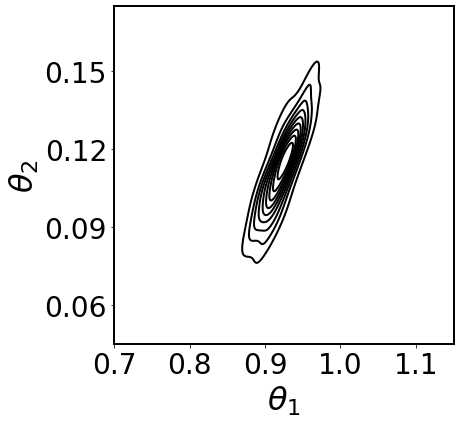

In [3]:
def ax_setting(ax):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.03))
    
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xlim([0.7, 1.15])
    ax.set_ylim([0.045, 0.175])  
    ax.set_xlabel(r"$\theta_1$", fontsize=32)
    ax.set_ylabel(r"$\theta_2$", fontsize=32)

fig, ax = plt.subplots(figsize=(6.5, 6))
ax_setting(ax)
sns.kdeplot(x=postsample[:,0], y=postsample[:,1], color="black", bw_method=0.5)
fig.tight_layout()
fig.savefig('../Fig/figure_5.eps', format='eps')


In [4]:
df1 = pd.read_pickle("./FDBayes_preds_beta=1.3898032903671265_nboot=100.pkl")
df1['label'].cat.rename_categories({'Data': 'Data', 'DFD Bayes': 'CMP (DFD-Bayes)'}, inplace=True)
df1['label'].cat.reorder_categories(['Data', 'CMP (DFD-Bayes)'], inplace=True)
df2 = pd.read_pickle("./Bayes_kfold=5_preds_calibrated.pkl")
df2['label'].cat.rename_categories({'Data': 'Data', 'Bayes': 'Poisson (Bayes)'}, inplace=True)
df2['label'].cat.reorder_categories(['Data', 'Poisson (Bayes)'], inplace=True)

/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  This is separate from the ipykernel package so we can avoid doing imports until
/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Cate

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


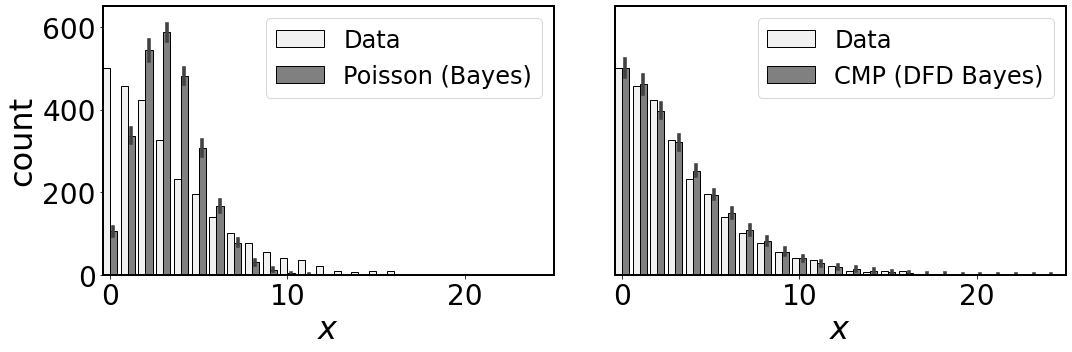

In [6]:
def ax_setting(ax, i):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)

    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xticks([0, 10, 20, 30])  
    ax.set_xticklabels(["0", "10", "20", "30"])
    ax.set_xlim([-0.4, 25])
    ax.set_ylim([0, 650])  
    ax.set_xlabel(r"$x$", fontsize=32)
    ax.set_ylabel(r"count", fontsize=32)
    if i != 0:
        ax.set_ylabel(r"", fontsize=32)
        ax.set_yticks([])
        
    ax.legend(loc=1, prop={'size': 24}, fontsize=32)
    

fig, axs = plt.subplots(1, 2, figsize=(15, 5), )
plt.subplots_adjust(wspace=1.25)
sns.barplot(x="index", y="count", hue="label", data=df2, color="gray", ci="sd", edgecolor="black", ax=axs[0])
sns.barplot(x="index", y="count", hue="label", data=df1, color="gray", ci="sd", edgecolor="black", ax=axs[1])
for i in range(2):
    ax_setting(axs[i], i)

fig.tight_layout()
fig.savefig('../Fig/figure_6.eps', format='eps')
